In [1]:
!git clone https://github.com/Tuchsanai/Apichi_IS_2024.git

Cloning into 'Apichi_IS_2024'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 38 (delta 4), reused 28 (delta 0), pack-reused 0
Receiving objects: 100% (38/38), 8.94 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
%cd /content/Apichi_IS_2024/Florence_2

/content/Apichi_IS_2024/Florence_2


# Install and import libraries

In [3]:
#!pip install accelerate
# !pip install flash_attn einops timm

#!pip install flash_attn einops timm

# pip install transformers
!pip install timm
# pip install packaging
# pip install wheel
# pip install ninja
!pip install flash_attn
# pip install einops
#!pip install accelerate




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [4]:
import textwrap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont
from transformers import AutoProcessor, AutoModelForCausalLM

# Import Florence-2 model

In [5]:
#model_id = 'microsoft/Florence-2-large'
model_id = 'microsoft/Florence-2-base'

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             trust_remote_code=True).eval()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [6]:
def florence2(task_prompt,images, text_input=None):
    """
    Calling the Microsoft Florence2 model
    """
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input

    inputs = processor(text=prompt, images=image, return_tensors="pt")

    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        early_stopping=False,
        do_sample=False,
        num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids,
                                            skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height))

    return parsed_answer





# Object Detection

In [8]:
image = Image.open('/content/Apichi_IS_2024/Florence_2/test_images/data/animal1.jpg')

task_prompt3 = '<OD>'
od_results = florence2(task_prompt3, image)
od_results['<OD>']

{'bboxes': [[115.80000305175781,
   184.6304931640625,
   666.6000366210938,
   717.2954711914062],
  [823.800048828125, 360.04949951171875, 955.800048828125, 676.4445190429688]],
 'labels': ['elephant', 'person']}

In [9]:
def plot_bbox(image, data):
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

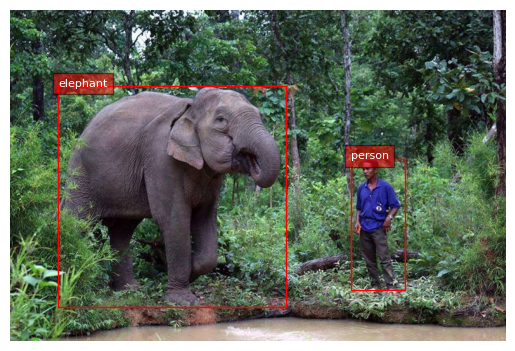

In [10]:
plot_bbox(image, od_results['<OD>']);

# Guided object detection

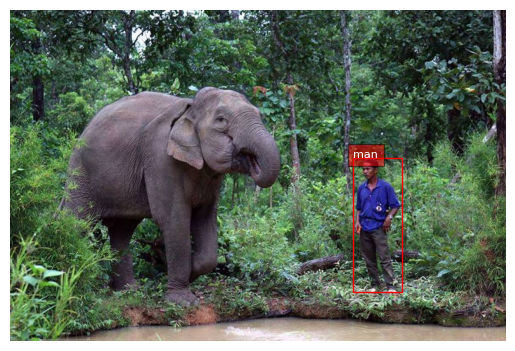

In [11]:
task_prompt4 = "<CAPTION_TO_PHRASE_GROUNDING>"

result = florence2(task_prompt4, image, text_input="man")

plot_bbox(image, result['<CAPTION_TO_PHRASE_GROUNDING>']);

In [12]:
def florence2(task_prompt, images, text_input=None):
    """
    Calling the Microsoft Florence2 model
    """
    results = []

    for image in images:
        if text_input is None:
            prompt = task_prompt
        else:
            prompt = task_prompt + text_input

        inputs = processor(text=prompt, images=image, return_tensors="pt")

        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            early_stopping=False,
            do_sample=False,
            num_beams=3,
        )
        generated_text = processor.batch_decode(generated_ids,
                                                skip_special_tokens=False)[0]
        parsed_answer = processor.post_process_generation(
            generated_text,
            task=task_prompt,
            image_size=(image.width, image.height))

        results.append(parsed_answer)

    return results



In [14]:
from PIL import Image
import os

def process_images(folder_path):
    # Get all image files in the folder
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

    for image_path in image_files:
        image_name = os.path.basename(image_path)
        image_name_without_extension = os.path.splitext(image_name)[0]

        # Load image using PIL
        try:
            image = Image.open(image_path)
        except IOError:
            print(f'Failed to open image: {image_path}')
            continue

        # Define task_prompt3 (if it's constant for all images)
        task_prompt3 = '<OD>'

        # Call your function to get results
        od_results_list = florence2(task_prompt3, [image])

        # Iterate over each result in the list
        for idx, od_results in enumerate(od_results_list):
            # Save results to a text file with the same name as the image
            output_file_path = os.path.join(folder_path, f'{image_name_without_extension}_{idx}.txt')

            with open(output_file_path, 'w') as f:
                # Write the results to the text file
                for key, value in od_results['<OD>'].items():
                    f.write(f"{key}: {value}\n")

            print(f'Results for {image_name} (index {idx}) saved to {output_file_path}')




# Example usage:
folder_path = '/content/Apichi_IS_2024/Florence_2/test_images/data'
#folder_path = '/content/Apichi_IS_2024/Florence_2/test_images/data'
process_images(folder_path)


Results for b2.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/b2_0.txt
Results for r2.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/r2_0.txt
Results for y3.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/y3_0.txt
Results for y1.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/y1_0.txt
Results for animal1.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/animal1_0.txt
Results for r3.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/r3_0.txt
Results for y2.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/y2_0.txt
Results for b1.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/b1_0.txt


In [ ]:
# <class_index> <x_center> <y_center> <width> <height>

# <class_index>: Index of the class (starting from 0).
# <x_center>, <y_center>: Center coordinates of the bounding box relative to the image size.
# <width>, <height>: Width and height of the bounding box relative to the image size.



In [16]:
import os
import json

def convert_to_yolo_format(bboxes, labels, image_width, image_height):
    yolo_annotations = []

    for bbox, label in zip(bboxes, labels):
        xmin, ymin, xmax, ymax = bbox

        # Calculate bounding box center and dimensions
        x_center = (xmin + xmax) / 2 / image_width
        y_center = (ymin + ymax) / 2 / image_height
        box_width = (xmax - xmin) / image_width
        box_height = (ymax - ymin) / image_height

        # Find the class index (you may need to adjust this based on your class mapping)
        class_index = get_class_index(label)

        # Append annotation in YOLO format
        yolo_annotations.append(f"{class_index} {x_center} {y_center} {box_width} {box_height}")

    return yolo_annotations

def get_class_index(label):
    # Define your class mapping here
    class_mapping = {
        'elephant': 0,
        'person': 1,
        'rose':2
        # Add more classes as needed
    }
    return class_mapping.get(label, -1)  # Return -1 if label not found

def process_images(folder_path):
    # Get all image files in the folder
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

    for image_path in image_files:
        image_name = os.path.basename(image_path)
        image_name_without_extension = os.path.splitext(image_name)[0]

        # Load image using PIL
        try:
            image = Image.open(image_path)
            image_width, image_height = image.size
        except IOError:
            print(f'Failed to open image: {image_path}')
            continue

        # Call your function to get annotations
        od_results_list = florence2('<OD>', [image])

        # Iterate over each result in the list
        for idx, od_results in enumerate(od_results_list):
            bboxes = od_results['<OD>']['bboxes']
            labels = od_results['<OD>']['labels']

            # Convert annotations to YOLO format
            yolo_annotations = convert_to_yolo_format(bboxes, labels, image_width, image_height)

            # Save YOLO annotations to a text file
            output_file_path = os.path.join(folder_path, f'{image_name_without_extension}_{idx}.txt')

            with open(output_file_path, 'w') as f:
                for annotation in yolo_annotations:
                    f.write(annotation + '\n')

            print(f'Annotations for {image_name} (index {idx}) saved to {output_file_path}')

# Example usage:
folder_path = '/content/Apichi_IS_2024/Florence_2/test_images/data'
#folder_path = 'testimages/annotate_images'
process_images(folder_path)


Annotations for b2.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/b2_0.txt
Annotations for r2.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/r2_0.txt
Annotations for y3.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/y3_0.txt
Annotations for y1.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/y1_0.txt
Annotations for animal1.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/animal1_0.txt
Annotations for r3.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/r3_0.txt
Annotations for y2.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/y2_0.txt
Annotations for b1.jpg (index 0) saved to /content/Apichi_IS_2024/Florence_2/test_images/data/b1_0.txt
